In [0]:
from __future__ import print_function
import numpy
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torchvision.datasets import ImageFolder
from PIL import Image
import numpy as np
from torchvision import datasets, transforms
from torch.autograd import Variable

In [0]:
class Net(nn.Module):
    """ConvNet -> Max_Pool -> RELU -> ConvNet -> Max_Pool -> RELU -> FC -> RELU -> FC -> SOFTMAX"""
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [0]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

In [0]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [0]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [14]:
example_data.shape

torch.Size([1000, 1, 28, 28])

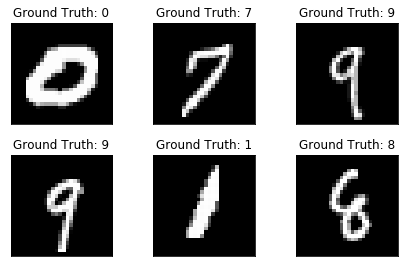

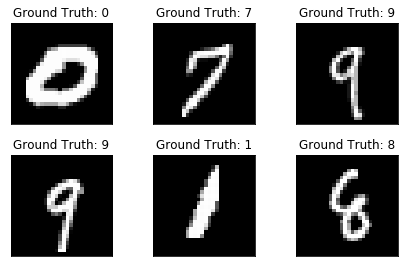

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [0]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [0]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [0]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [0]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  test_counter.append(
        (batch_idx*64) + ((epoch-1)*len(test_loader.dataset)))
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [33]:
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310855
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.206359
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.120307
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.985732
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.673628
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.247760
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.817778
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.766310
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.997637
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.599685
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.358771
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.409205
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.516101
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.298008
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.357770
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.240900
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.461642
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.326171
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.335668
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.144333
Train Epoch: 1 [12800/60000 (

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1064, Accuracy: 9673/10000 (97%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.214084
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.109692
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.119285
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.111159
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.023155
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.097425
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.048231
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.199295
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.277890
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.037070
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.266731
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.187291
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.033346
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.117292
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.100574
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.090587
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.090499
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.039333
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.033169
Train Epoch: 2 [12160

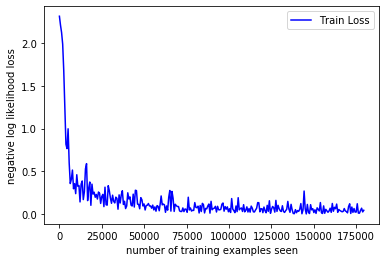

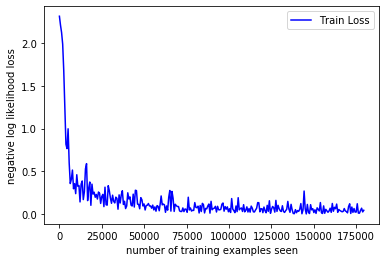

In [35]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [0]:
with torch.no_grad():
  output = network(example_data)

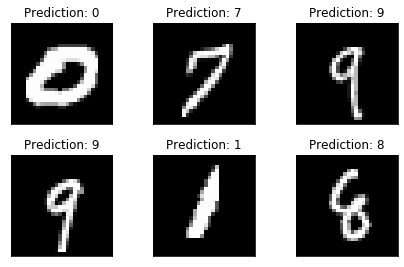

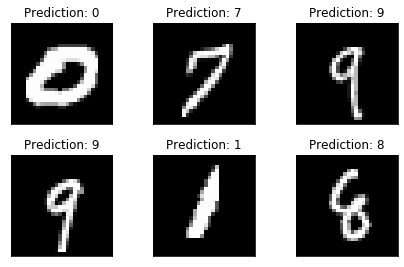

In [37]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig